In [1]:
import numpy as np
# import spherical_geometry
import matplotlib.pyplot as plt
# from spherical_geometry.polygon import SphericalPolygon
from scipy import stats
%matplotlib inline

In [2]:
test_3d_path="/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/3d_ppm_no_topo/vsv.npy"
data=np.load(test_3d_path)

In [3]:
data.shape

(405, 249, 321)

In [4]:
initial_1d_avg=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    initial_1d_avg[i]=np.mean(data[:,:,i][data[:,:,i]!=-1])

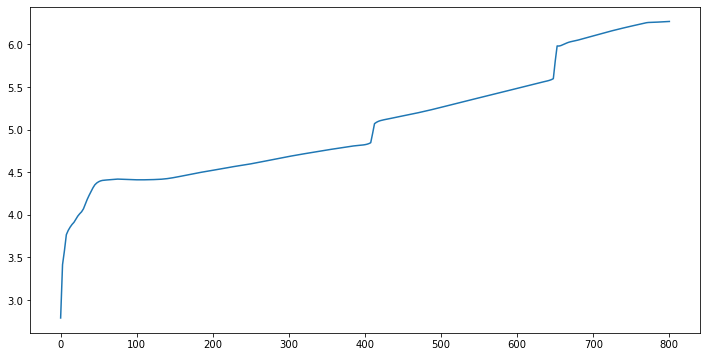

In [5]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg)

## Now we select all the points within tao's simulation region.

In [6]:
boundary_points=[
    [91.3320117152011,9.37366242174489],
    [144.284491292185,2.08633373396527],
    [174.409435753150,48.6744705245903],
    [74.6060844556399,61.1396992149365],
    [91.3320117152011,9.37366242174489]
]

In [7]:
boundary_points=np.array(boundary_points)

In [8]:
boundary_points

array([[ 91.33201172,   9.37366242],
       [144.28449129,   2.08633373],
       [174.40943575,  48.67447052],
       [ 74.60608446,  61.13969921],
       [ 91.33201172,   9.37366242]])

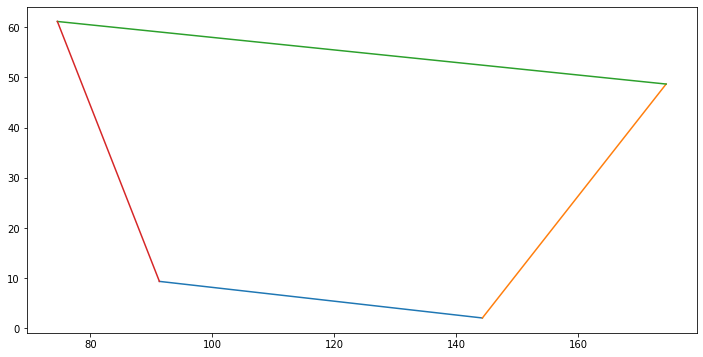

In [9]:
plt.figure(figsize=(12,6))
for index in range(4):
    plt.plot([boundary_points[index,0],boundary_points[index+1,0]],[boundary_points[index,1],boundary_points[index+1,1]])

In [10]:
def convert_to_sp(lon,lat):
    theta=np.deg2rad(90-lat)
    phi=np.deg2rad(lon)
    z=np.cos(theta)
    r=np.sin(theta)
    x=np.cos(phi)
    y=np.sin(phi)
    return x,y,z

In [11]:
# convert the array of lon,lat to x,y,z
boundary_points_new=[]
for i in range(5):
    boundary_points_new.append(convert_to_sp(boundary_points[i,0],boundary_points[i,1]))
boundary_points=np.array(boundary_points_new)

In [12]:
boundary_points

array([[-0.0232459 ,  0.99972978,  0.16287244],
       [-0.81192555,  0.583761  ,  0.03640535],
       [-0.99524346,  0.097419  ,  0.75096998],
       [ 0.26545374,  0.9641236 ,  0.87579917],
       [-0.0232459 ,  0.99972978,  0.16287244]])

In [13]:
sp=SphericalPolygon(boundary_points)

NameError: name 'SphericalPolygon' is not defined

In [14]:
sp

NameError: name 'sp' is not defined

## we loop through all points in each level, and determine if this point is inside the polygon, and then calculate the mean value.

In [15]:
rawminlon=74
rawmaxlon=175
rawminlat=0
rawmaxlat=62
rawmindep=0
rawmaxdep=800
# and we know the lon,lat spacing is 0.25 degree while dep spacing is 2.5km.

In [16]:
data.shape

(405, 249, 321)

Firstly we build up a matrix of the shape 405,209 and see if it's within the box.

In [17]:
within_matrix=np.zeros((405,249),dtype=np.bool)
for ilon in range(405):
    for ilat in range(249):
        lon=rawminlon+ilon*0.25
        lat=rawminlat+ilat*0.25
        x,y,z=convert_to_sp(lon,lat)
        if(sp.contains_point((x,y,z))):
            within_matrix[ilon,ilat]=True

NameError: name 'sp' is not defined

In [18]:
tao_1d_avg=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    data_alltao=data[:,:,i][within_matrix]
    data_use=data_alltao[data_alltao>0]
    tao_1d_avg[i]=np.mean(data_use)

/home/xiziyi/anaconda3/envs/seismology/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/xiziyi/anaconda3/envs/seismology/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
tao_1d_avg

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

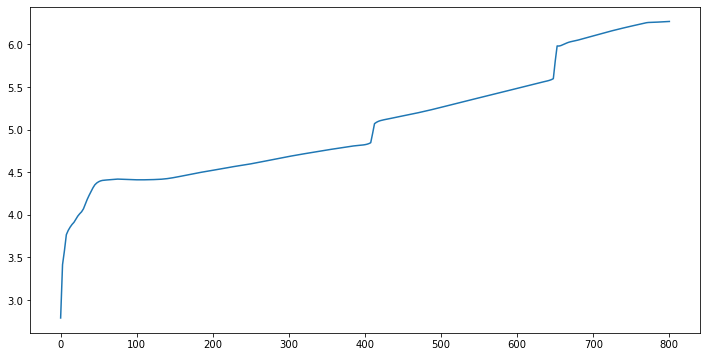

In [20]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg)
plt.plot(np.arange(0,801,2.5),tao_1d_avg)

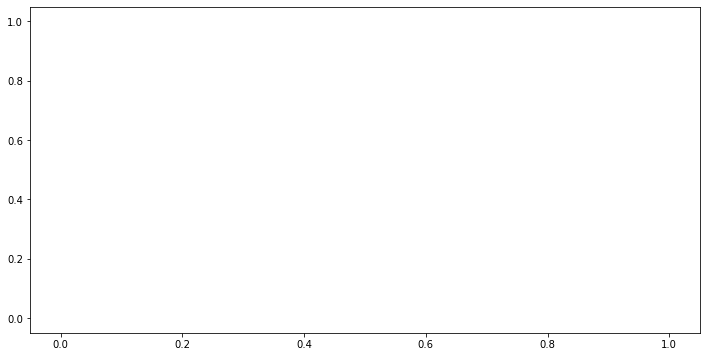

In [21]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(0,801,2.5),initial_1d_avg)
plt.plot(np.arange(0,801,2.5),tao_1d_avg-initial_1d_avg)

In [22]:
data_1d=np.load("/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/1d_ppm_no_topo/vsv.npy")

In [23]:
initial_1d_taouse=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    initial_1d_taouse[i]=np.mean(data_1d[:,:,i][data_1d[:,:,i]!=-1])

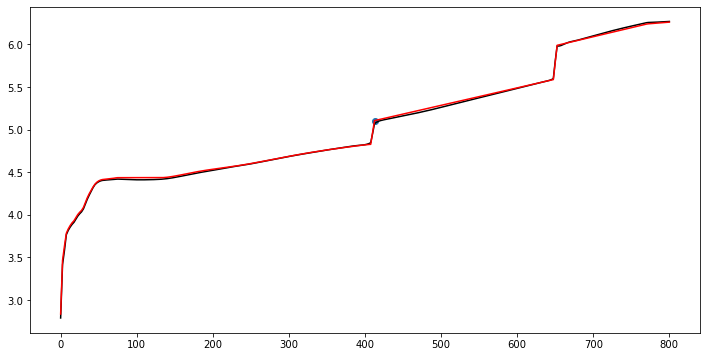

In [24]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])

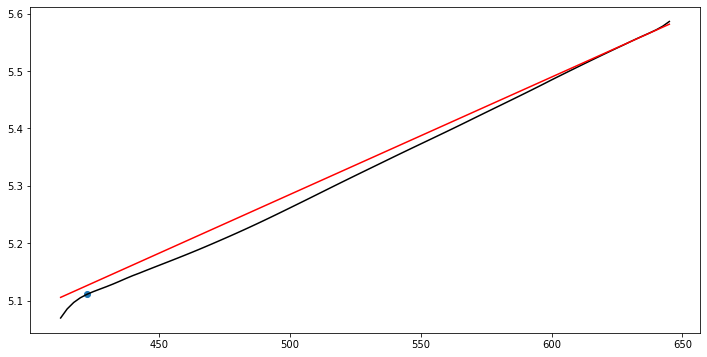

In [25]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(412.5,647.5,2.5),initial_1d_avg[165:259],color="k")
plt.plot(np.arange(412.5,647.5,2.5),initial_1d_taouse[165:259],color="r")
plt.scatter(422.5,initial_1d_avg[169])

(5.5, 6.2)

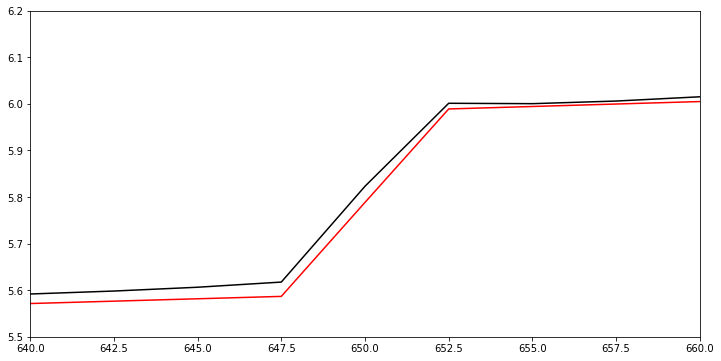

In [26]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg+0.02,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((640,660))
plt.ylim((5.5,6.2))

In [27]:
(647.5-412.5)/2.5,647.5/2.5,412.5/2.5

(94.0, 259.0, 165.0)

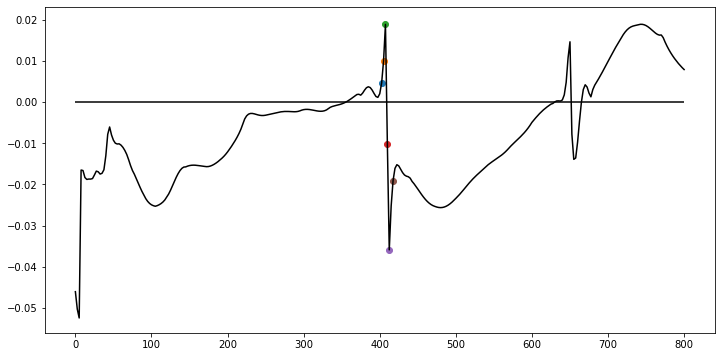

In [28]:
diff=initial_1d_avg-initial_1d_taouse
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_taouse,color="k")
plt.scatter(402.5,diff[int(402.5/2.5)])
plt.scatter(405,diff[int(405/2.5)])
plt.scatter(407.5,diff[int(407.5/2.5)])
plt.scatter(410,diff[int(410/2.5)])
plt.scatter(412.5,diff[int(412.5/2.5)])
plt.scatter(417.5,diff[int(417.5/2.5)])
plt.hlines(xmin=0,xmax=800,y=0)

So now we could do the linear fitting from 412.5 to 657.5.

In [29]:
(647.5-412.5)/2.5+1

95.0

In [30]:
x_tofit=np.arange(95)*2.5+412.5

In [31]:
y_tofit=initial_1d_avg[165:260]

In [32]:
y_tofit.shape

(95,)

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [34]:
slope, intercept, r_value, p_value, std_err

(0.0021631038544572333,
 4.185238226698001,
 0.9995374336704191,
 6.926968550924797e-143,
 6.824779296106265e-06)

In [35]:
# get new initial_1d_avg
initial_1d_avg_fit1d=initial_1d_avg.copy()
for index in range(165,260):
    depth=index*2.5
    initial_1d_avg_fit1d[index]=depth*slope+intercept

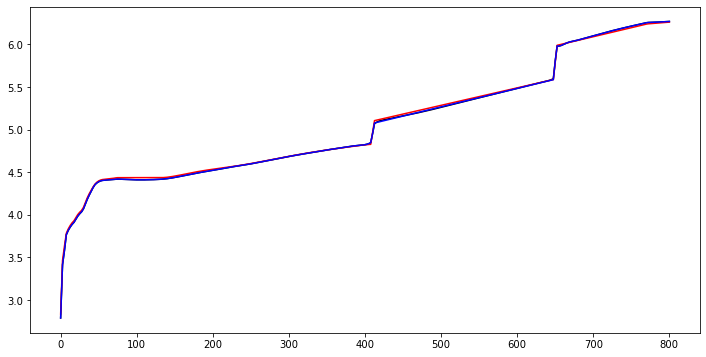

In [36]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fit1d,color="b")

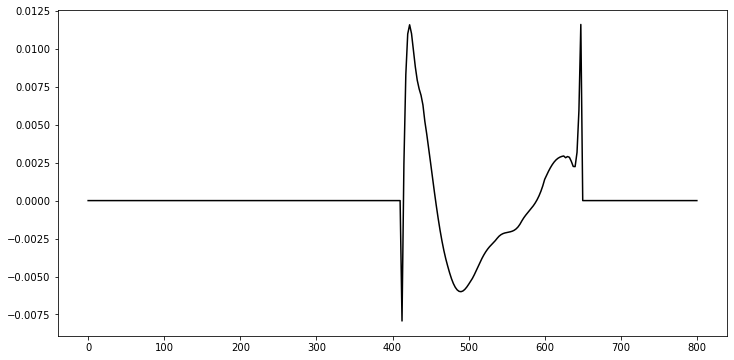

In [37]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_avg_fit1d,color="k")

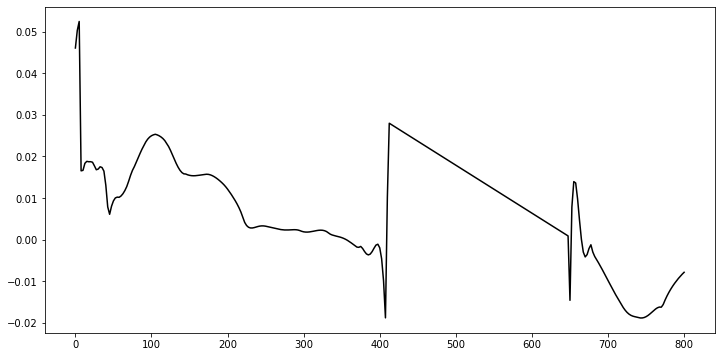

In [38]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_taouse-initial_1d_avg_fit1d,color="k")

In [39]:
x_tofit=[412.5,647.5]
y_tofit=[initial_1d_avg[int(412.5/2.5)],initial_1d_avg[int(647.5/2.5)]]

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [41]:
slope, intercept, r_value, p_value, std_err

(0.002246215006452992, 4.143025470718397, 1.0, 0.0, 0.0)

In [42]:
# get new initial_1d_avg
initial_1d_avg_fit1d=initial_1d_avg.copy()
for index in range(165,260):
    depth=index*2.5
    initial_1d_avg_fit1d[index]=depth*slope+intercept

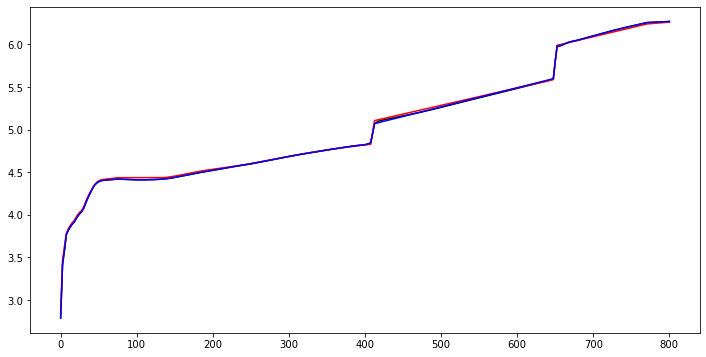

In [43]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fit1d,color="b")

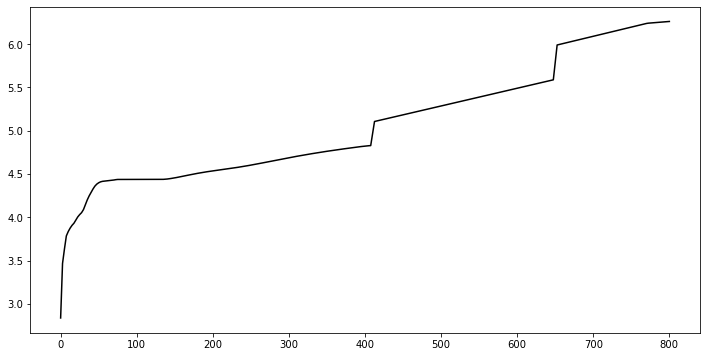

In [44]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="k")

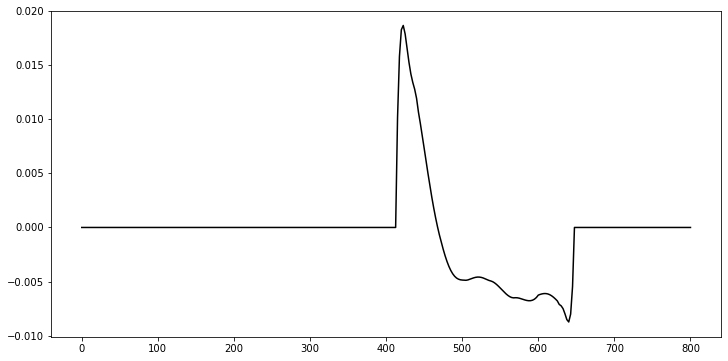

In [45]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_avg_fit1d,color="k")

## Test if there is any -1 in data

In [46]:
depth=102
for i in range(data.shape[0]):
    toplot=False
    toplot_again=False
#     print("="*20)
    for j in range(data.shape[1]):
        if((data[i,j,depth]<0.0) and (not toplot_again) and (not toplot)):
            continue
        if((data[i,j,depth]>0.0) and (not toplot_again) and (not toplot)):
            toplot=True
            continue
        if((data[i,j,depth]>0.0) and (not toplot_again) and (toplot)):
            continue
        if((data[i,j,depth]<0.0) and (not toplot_again) and (toplot)):
            toplot_again=True
            continue
        if((data[i,j,depth]>0.0) and (toplot_again) and (toplot)):
            print(i,j,data[i,j,depth])

Use inner points for interpolation

In [47]:
(640-420)/2.5+1

89.0

In [48]:
640/2.5,420/2.5

(256.0, 168.0)

In [49]:
x_tofit=np.arange(89)*2.5+420
y_tofit=initial_1d_avg[168:257]
y_tofit.shape

(89,)

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [51]:
slope, intercept, r_value, p_value, std_err

(0.00215732357739816,
 4.188037685923019,
 0.9995326396896085,
 1.4170171948991013e-133,
 7.073735976663795e-06)

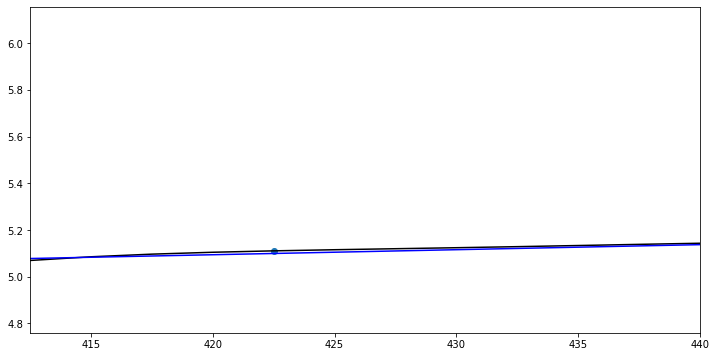

In [52]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(400,700,2.5),initial_1d_avg[160:280],color="k")
# plt.plot(np.arange(400,700,2.5),initial_1d_taouse[160:280],color="r")
plt.plot(np.arange(412.5,700,2.5),np.arange(412.5,700,2.5)*slope+intercept,color="b")
plt.scatter(422.5,initial_1d_avg[169])
plt.xlim((412.5,440))
plt.show()

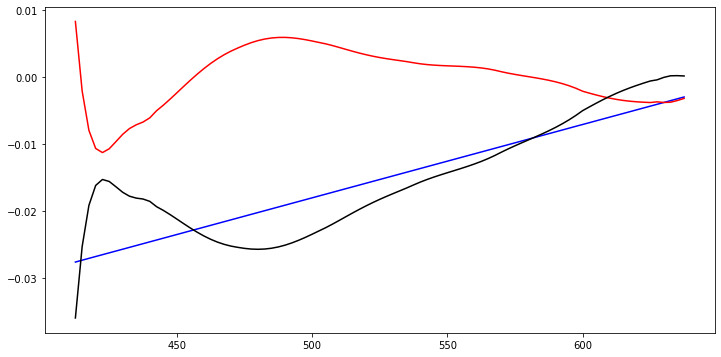

In [53]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(400,700,2.5),initial_1d_avg[160:280],color="k")
# plt.plot(np.arange(400,700,2.5),initial_1d_taouse[160:280],color="r")
plt.plot(np.arange(412.5,640,2.5),np.arange(412.5,640,2.5)*slope+intercept-initial_1d_taouse[165:256],color="b")
plt.plot(np.arange(412.5,640,2.5),np.arange(412.5,640,2.5)*slope+intercept-initial_1d_avg[165:256],color="r")
plt.plot(np.arange(412.5,640,2.5),initial_1d_avg[165:256]-initial_1d_taouse[165:256],color="k")
# plt.scatter(422.5,initial_1d_avg[169])
# plt.xlim((412.5,440))
plt.show()

## Here we replace only the value between 410 and 650 as the average model.

In [54]:
410/2.5,650/2.5

(164.0, 260.0)

In [55]:
165,260

(165, 260)

In [56]:
data_1d=np.load("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/1d_ppm/vsv.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/1d_ppm/vsv.npy'

In [57]:
d1.shape

NameError: name 'd1' is not defined

In [58]:
d1[:,:,:165]=initial_1d_avg[:165]

NameError: name 'd1' is not defined

In [59]:
np.save("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/1d_ppm/vsv.modified_to_165.npy",d1)

NameError: name 'd1' is not defined

## Between 410 and 650, we increase the avg with the value of 0.02.

In [60]:
initial_1d_avg.shape

(321,)

In [61]:
410/2.5,650/2.5

(164.0, 260.0)

In [62]:
# initial_1d_avg_add_02=initial_1d_avg.copy()
# initial_1d_avg_add_02[165:260]=initial_1d_avg_add_02[165:260]+0.02
# per=np.zeros(data.shape)
# for index in range(321):
#     per[:,:,index]=data[:,:,index]/initial_1d_avg_add_02[index]-1

In [63]:
# np.save("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/per_3d_1d/vsv.add02.npy",per)

In [64]:
slope, intercept, r_value, p_value, std_err

(0.00215732357739816,
 4.188037685923019,
 0.9995326396896085,
 1.4170171948991013e-133,
 7.073735976663795e-06)

replace np.arange(412.5,640,2.5) with the fitted one.

In [65]:
initial_1d_avg_fitted=initial_1d_avg.copy()
# initial_1d_avg_fitted[168:256]=np.arange(420,640,2.5)*slope+intercept+0.027
initial_1d_avg_fitted[165:167]=initial_1d_avg_fitted[165:167]+0.0105
initial_1d_avg_fitted[167]=initial_1d_avg_fitted[167]+0.0115
initial_1d_avg_fitted[168]=initial_1d_avg_fitted[168]+0.0125
initial_1d_avg_fitted[159:162]=initial_1d_avg_fitted[159:162]-0.003
# we change to tao's 1d
initial_1d_avg_fitted[169:256]=initial_1d_taouse[169:256]
initial_1d_avg_fitted[:159]=initial_1d_taouse[:159]

(4.7, 5.3)

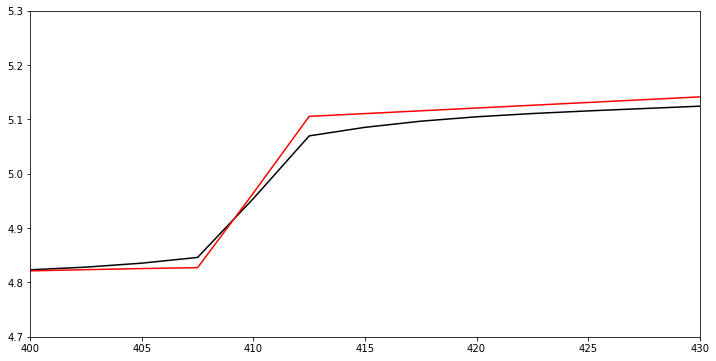

In [66]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((400,430))
plt.ylim((4.7,5.3))

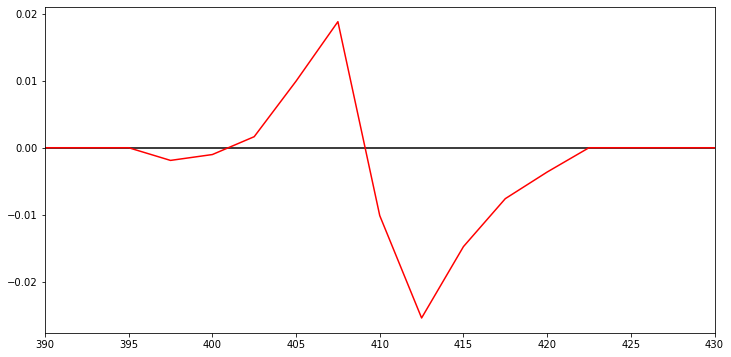

In [67]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(0,801,2.5),initial_1d_avg_fitted,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fitted-initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((390,430))
ax=plt.gca()
ax.hlines(y=0, xmin=0, xmax=450,color='k')
# plt.ylim((4.7,5.3))

In [68]:
per=np.zeros(data.shape)
for index in range(321):
    per[:,:,index]=data[:,:,index]/initial_1d_avg_fitted[index]-1
tao_per=data/data_1d-1
per[:,:,:159]=tao_per[:,:,:159]

In [69]:
np.save("/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/3d_1d_per_ppm_no_topo/vsv.npy",per)

In [70]:
420/2.5

168.0

## We can generate the text file for plotting.

Firstly we smooth the 410 and 660.

In [71]:
410/2.5

164.0

In [72]:
650/2.5

260.0

In [73]:
per[:,:,164]=(per[:,:,163]+per[:,:,165])/2
per[:,:,260]=(per[:,:,261]+per[:,:,259])/2

In [74]:
per.shape

(405, 249, 321)

In [75]:
rawminlon=74
rawmaxlon=175
rawminlat=0
rawmaxlat=62
rawmindep=0
rawmaxdep=800

In [76]:
output_path="/home/xiziyi/Japan_slab/Japan_Slab_code/data/model/vsv.per.txt"
with open(output_path,"w") as f:
    for ilon in range(405):
        for ilat in range(249):
            for idep in range(321):
                lon=rawminlon+ilon*0.25
                lat=rawminlat+ilat*0.25
                dep=rawmindep+idep*2.5
#                 if(per[ilon,ilat,idep]<0):
#                     per[ilon,ilat,idep]=9999
                f.write(f"{lon:.2f} {lat:.2f} {dep:.1f} {per[ilon,ilat,idep]:.4f}\n")